In [7]:
import pandas as pd

In [131]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('breast-cancer-data.csv')


In [11]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33           184.60   
1           ...                    24.99          23.41           158.80   
2           ...                    23.57          25.53           152.50   
3           ...                    14.91          26.50            98.87   
4           ...                    22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 32 columns]

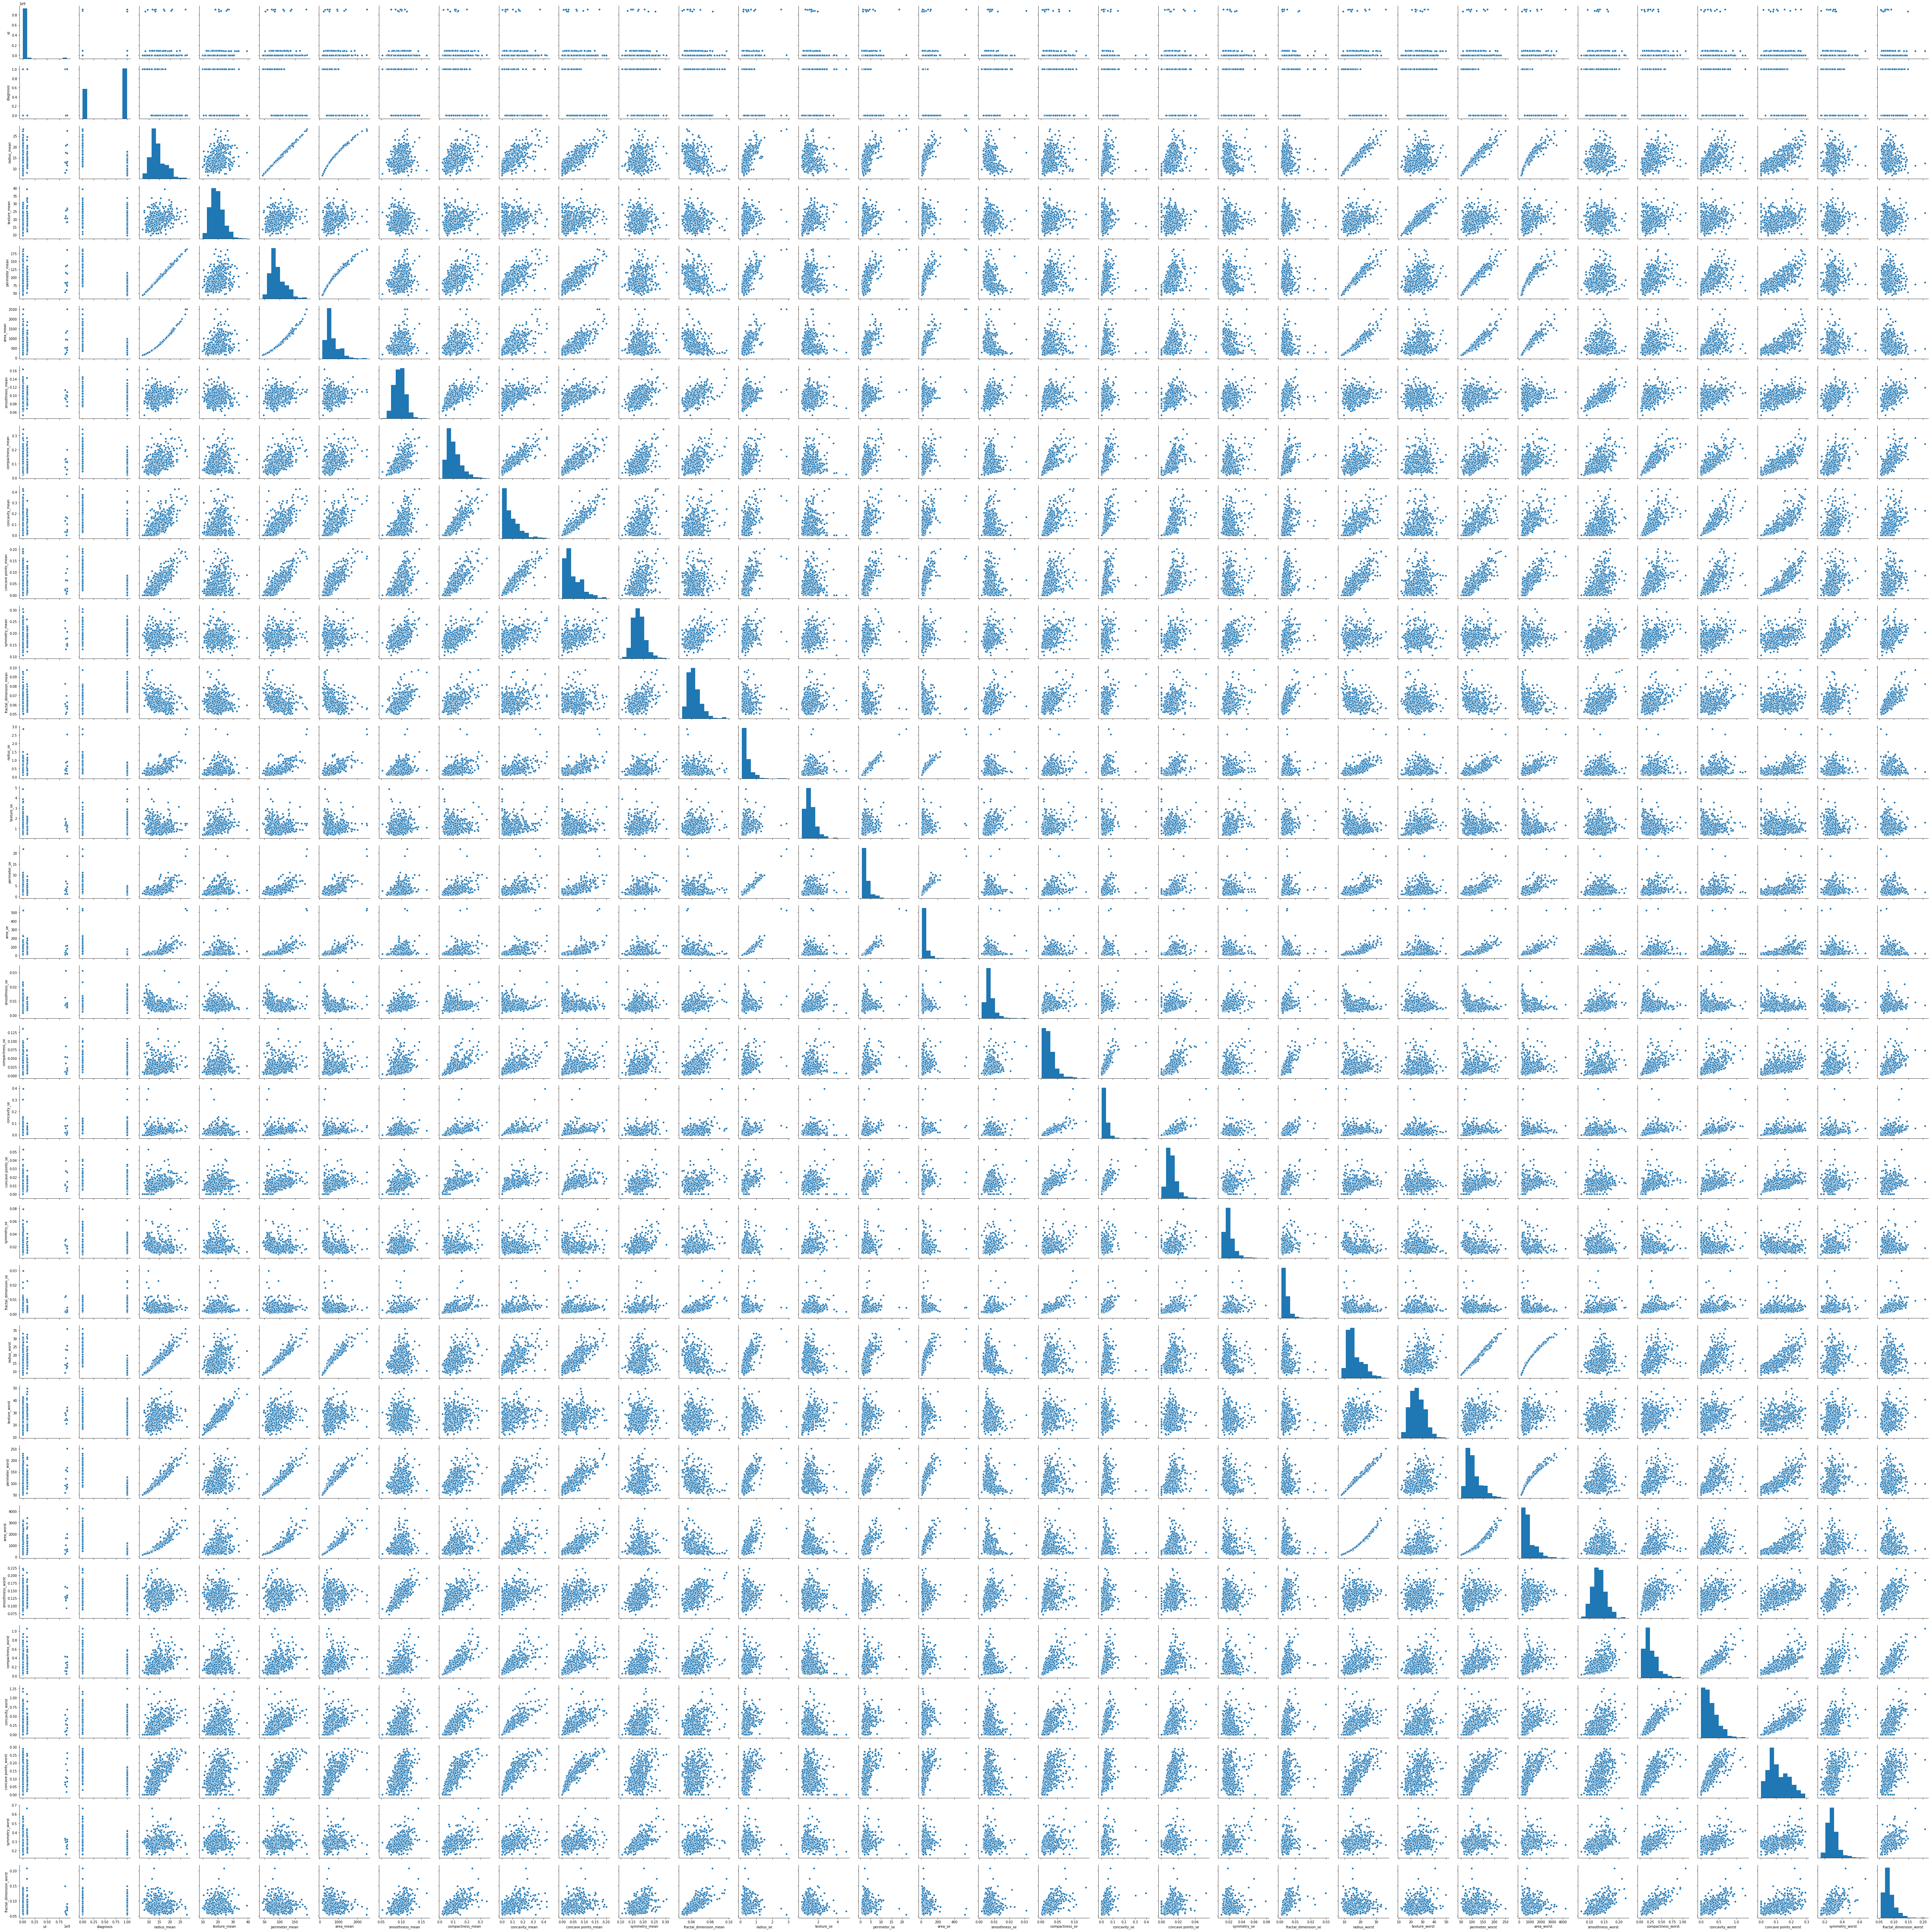

In [133]:
sns.pairplot(data)

In [12]:
data.shape

(569, 32)

In [13]:
##Label Encoder (to covert object value in  int)


In [14]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [15]:
data['diagnosis'] = data['diagnosis'].map({'M':0,'B':1})

In [16]:
font = {
    'size': 'xx-large',
    'weight': 'bold'
}

Text(0.5, 1.0, 'CORELATIONS')

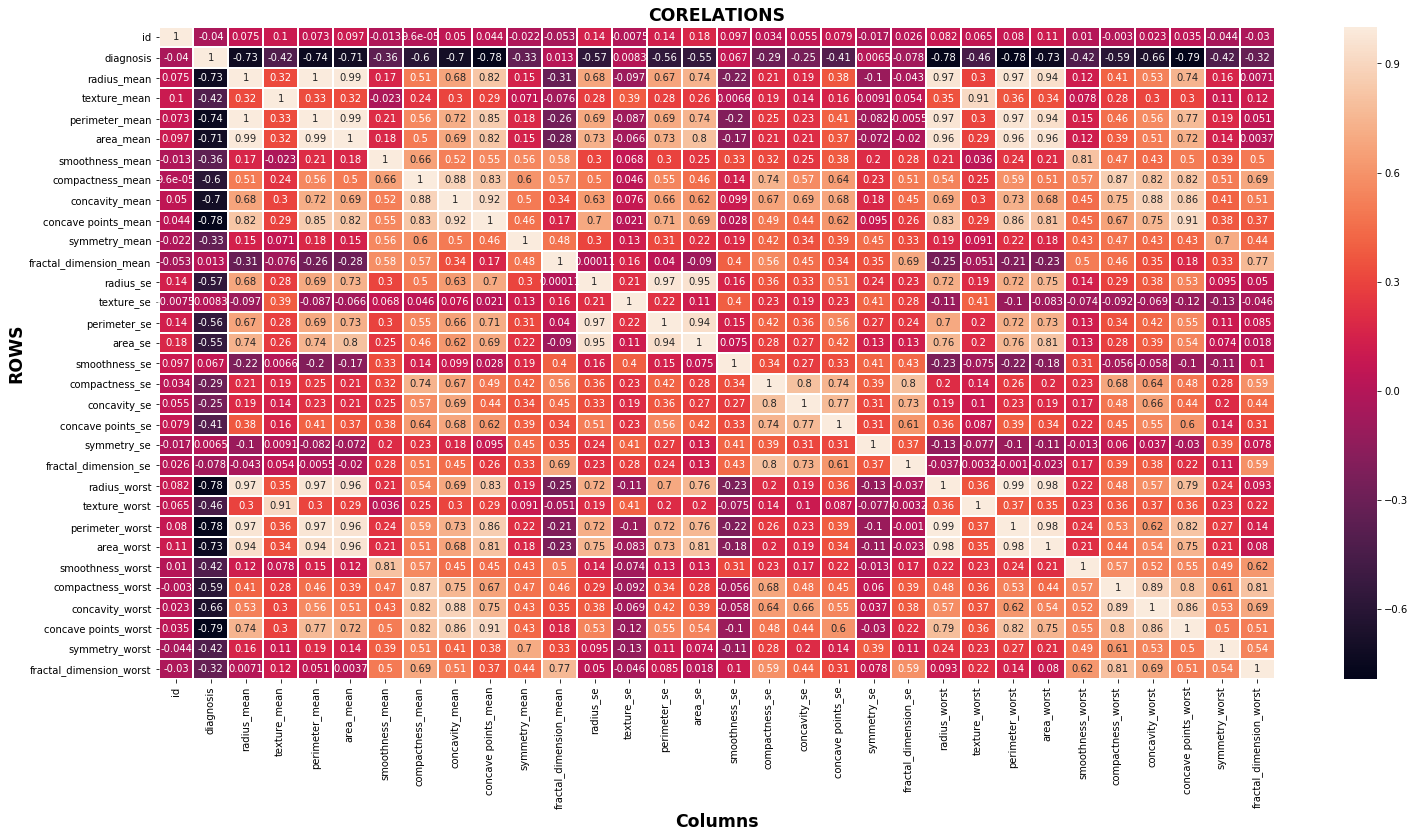

In [17]:
plt.figure(figsize=(25,12))
sns.heatmap(data.corr(),annot = True, linewidths=1,
           linecolor='w')
plt.xlabel('Columns',fontdict=font)
plt.ylabel('ROWS',fontdict=font)
plt.title('CORELATIONS', fontdict=font)

In [18]:
##LOGISTIC REGRESSION

In [19]:
numerical_data = data[['radius_mean','perimeter_mean','concave points_mean','radius_worst','perimeter_worst','concave points_worst']].copy()

In [20]:
survival_data = data['diagnosis'].copy()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X, x_test, Y, y_test = train_test_split(numerical_data,
                                       survival_data,
                                       test_size=0.3,
                                       random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X,Y)

C:\Users\Akash Malik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
predictions = model.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
confusion = confusion_matrix(predictions, y_test)

In [29]:
confusion

array([[ 59,   1],
       [  4, 107]], dtype=int64)

In [30]:
score = accuracy_score(predictions,y_test)

In [31]:
score

0.9707602339181286

In [32]:
##KNN CLASSIFIER

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
output_data = data['diagnosis'].copy()

In [35]:
X, x_test, Y, y_test = train_test_split(numerical_data, output_data, test_size=0.2, random_state = 42)

In [36]:
model = KNeighborsClassifier(n_neighbors=10)

In [37]:
model.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [38]:
prediction = model.predict(x_test)

In [39]:
score = accuracy_score(y_test, prediction)
score

0.9736842105263158

In [40]:
##DECISION TREE

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
decision_tree_model = DecisionTreeClassifier()

In [59]:
features = data[['radius_mean','perimeter_mean','concave points_mean','radius_worst','perimeter_worst','concave points_worst']].copy()


In [60]:
decision_tree_model.fit(features, output_data)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
X, x_test, Y, y_test = train_test_split(features, output_data, test_size=0.2, random_state = 42)

In [62]:
prediction = model.predict(x_test)

In [63]:
score = accuracy_score(y_test, prediction)
score

0.9736842105263158

In [67]:
##SVM(SUPPORT VECTOR MACHINE)

In [68]:
from sklearn.svm import SVC

In [72]:
training_data_SVM = data[['radius_mean','perimeter_mean','concave points_mean','radius_worst','perimeter_worst','concave points_worst']].copy()

In [73]:
survival_data_SVM = data['diagnosis'].copy()

In [74]:
model = SVC()

In [125]:
X, x_test, Y, y_test = train_test_split(training_data_SVM, survival_data_SVM,
                                       test_size=0.2, random_state = 42)

In [126]:
model.fit(X, Y)

C:\Users\Akash Malik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [127]:
model_predictions = model.predict(x_test)

In [128]:
score = accuracy_score(model_predictions, y_test)

In [129]:
score

0.9649122807017544